<a href="https://colab.research.google.com/github/Swatantra-D/Segmentation/blob/main/OCT_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####




### import libraries

In [1]:
import os
import sys
import cv2
import PIL
import skimage
import sklearn
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
maskpath = r"C:\Users\Swata\OneDrive\Desktop\OCT\Mask"
imagepath = r"C:\Users\Swata\OneDrive\Desktop\OCT"

In [3]:
im_width = 1712
im_height = 512

In [4]:
images = os.listdir(imagepath)
masks = os.listdir(maskpath)

In [ ]:
IMAGES = np.zeros((len(masks), im_height, im_width, 3), dtype=np.float32)
MASKS = np.zeros((len(masks), im_height, im_width, 1), dtype=np.float32)

for n,image in enumerate(masks):

    img = img_to_array(load_img(r"{}\{}".format(imagepath,image[:-4]+".BMP")))
    img = resize(img, (512, 1712, 3), mode = 'constant', preserve_range = True)
    # img = cv2.resize(img, (512, 512))         

    mask = img_to_array(load_img(r"{}\{}".format(maskpath,image)))
    mask = resize(mask, (512, 1712, 1), preserve_range = True)    
    # mask = cv2.resize(mask, (512, 512))   

    IMAGES[n] = img/255.0
    MASKS[n] = mask/1.0

In [ ]:
IMAGES = np.zeros((len(masks), im_height, im_width, 3), dtype=np.float32)
MASKS = np.zeros((len(masks), im_height, im_width, 1), dtype=np.float32)
for n,image in enumerate(masks):


    img = cv2.imread(r"{}\{}".format(imagepath,image[:-4]+".BMP"),1)
    img = cv2.resize(img,(512, 512))
    img = img_to_array(img)
    # img = resize(img, (512, 1712, 3), mode = 'constant', preserve_range = True)
     

    mask = cv2.imread(r"{}\{}".format(maskpath,image),0)
    mask = cv2.resize(mask,(512, 512))
    mask = img_to_array(mask)  

    IMAGES[n] = img/255.0
    MASKS[n] = mask/1.0

error: ignored

In [ ]:
np.unique(MASKS[0])

array([0., 1., 2., 3.], dtype=float32)

In [ ]:
IMAGES.shape

(46, 512, 512, 3)

In [ ]:
def split_images(img,msk,square_arm=512):
    
    """ This is a simple function to split the 512 by 1712 images in three square size images"""

""" The plan:
images are kept in a 4d array - instances, rows, cols and channels, we need to split the datasets into
three images of col 512 
how to do it? rearrange with increasing the instance id


((46, 512, 1712, 3), (46, 512, 1712, 1))

In [ ]:
img = IMAGES[0:2]
# img = img[0][:][:512*3][:]
# np.reshape(img,(6,512,512))

(512, 1712, 3)

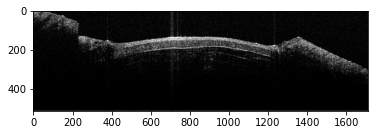

In [ ]:
plt.imshow(img[0])
img[0].shape
# (1712 - (512 * 3)) / 2

In [ ]:
np.unique(MASKS[2])

array([0., 1., 2., 3.], dtype=float32)

### Hide em



In [ ]:
C = Image.open(r"{}\{}".format(imagepath,images[0]))
np.asarray(C).shape

(512, 1712, 3)

In [ ]:
from torchvision import transforms

In [ ]:
transform = transforms.ToTensor()

In [ ]:
img_array = np.reshape(IMAGES, (len(IMAGES), 512, 1712, 3))
img_array = img_array.astype('float32') / 255.

C:\Users\Swata\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: ignored

In [ ]:
IMAGES[0].shape

(512, 1712, 3)

In [ ]:
img = cv2.resize(IMAGES[0],(1712, 512))

In [ ]:
img.shape

(512, 1712, 3)

### Next


In [ ]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

Segmentation Models: using `keras` framework.


In [ ]:
sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(IMAGES, MASKS, test_size=0.33, random_state=2022)

In [ ]:
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)
X_train = preprocess_input(X_train)
X_valid = preprocess_input(X_valid)


In [ ]:
model = Unet(BACKBONE, encoder_weights="imagenet")
model.compile('Adam', loss="categorical_crossentropy", metrics=[iou_score])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=1,
    epochs=25,
    validation_data=(X_valid, y_valid),
)

Epoch 1/25
30/30 [==============================] - 78s 2s/step - loss: 0.0000e+00 - iou_score: 7.7175e-11 - val_loss: 0.0000e+00 - val_iou_score: 5.6132e-10
Epoch 2/25
30/30 [==============================] - 52s 2s/step - loss: 0.0000e+00 - iou_score: 1.8006e-10 - val_loss: 0.0000e+00 - val_iou_score: 9.1044e-11
Epoch 3/25
30/30 [==============================] - 52s 2s/step - loss: 0.0000e+00 - iou_score: 4.4487e-10 - val_loss: 0.0000e+00 - val_iou_score: 1.6850e-10
Epoch 4/25
30/30 [==============================] - 49s 2s/step - loss: 0.0000e+00 - iou_score: 1.1646e-09 - val_loss: 0.0000e+00 - val_iou_score: 3.7315e-10
Epoch 5/25
30/30 [==============================] - 49s 2s/step - loss: 0.0000e+00 - iou_score: 4.0148e-09 - val_loss: 0.0000e+00 - val_iou_score: 0.1921
Epoch 6/25
30/30 [==============================] - 49s 2s/step - loss: 0.0000e+00 - iou_score: 1.6822e-08 - val_loss: 0.0000e+00 - val_iou_score: 6.0163e-09
Epoch 7/25
30/30 [==============================] - 49s 

(512, 512, 3)

# Freash start

In [5]:
import os
import sys
import cv2

In [25]:
image1 = os.path.join(imagepath,images[0])
masks1 = os.path.join(maskpath,masks[0])

In [7]:
image1

'C:\\Users\\Swata\\OneDrive\\Desktop\\OCT\\CCF_wd0_1.BMP'

In [8]:
image_1 = cv2.cvtColor(cv2.imread(image1),cv2.COLOR_BGR2RGB)

In [11]:
type(image_1)



numpy.ndarray

In [31]:
masks_1 = cv2.imread(masks1,-1)

In [32]:
np.unique(masks_1)

array([0, 1, 2, 3], dtype=uint16)